### Домашнее задание 2
#### Копчев Владислав, 197

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy import stats

### Ход работы

Загрузим наши данные

In [6]:
df = pd.read_csv('train_data.csv')

In [7]:
df.sample(4)

,2019-01-01,2019-01-02,2019-01-03,2019-01-04,2019-01-05,2019-01-06,2019-01-07,2019-01-08,2019-01-09,2019-01-10,...,2020-12-21,2020-12-22,2020-12-23,2020-12-24,2020-12-25,2020-12-26,2020-12-27,2020-12-28,2020-12-29,2020-12-30
46121,-1.127856,-1.042334,-4.219867,-5.049594,-4.440508,-3.111172,-2.015392,-0.421739,0.228379,-40.935897,...,1121.493820,1119.642678,1122.877222,1143.647593,1140.889414,1141.531647,1140.446535,1141.271723,1141.168422,1089.248096
10843,0.326760,-0.159800,3.812436,8.244118,8.533776,8.897108,8.731062,9.520726,8.409211,9.491841,...,-21.314816,-20.723012,-21.556284,-27.070017,-24.082054,-24.275722,-25.683266,-24.407345,-22.725692,-24.103832
11971,0.217692,2.701522,3.682768,1.608411,-0.018460,-2.142890,-3.765648,-4.333355,-4.589151,-7.477840,...,-22.701027,-22.896914,-21.023394,-19.609546,-18.526752,-16.807490,-19.588571,-18.695466,-19.155813,-16.288169
31169,0.426942,0.484006,2.292934,1.748287,1.676861,4.574071,4.921645,6.247979,7.794689,8.759046,...,99.356040,98.316256,99.687708,98.259015,98.459407,99.850827,100.333784,101.740071,101.578761,102.138845


Нам нужно измерить среднюю метрику по всем пользователям. `Просто df.sample(5000)` не сработал. Попробуем "случайный поиск", о котором говорилось на лекции 7. Будем искать случайные тройки элементов, близких по дисперсии и матожиданию при $\varepsilon = \overline{s}^2 \cdot 0,35$ и $\varepsilon = \overline{x} \cdot 0,35$ соответственно.

In [2]:
import scipy
from scipy.stats import levene

In [212]:
x1 = []
x2 = []
x3 = []

while len(x1) < 5000:
    i1 = np.random.randint(df.shape[0])
    i2 = np.random.randint(df.shape[0])
    i3 = np.random.randint(df.shape[0])

    if abs(df.iloc[i1].mean().mean() - df.iloc[i2].mean().mean()) < abs(df.mean().mean()) * 0.35 and \
    abs(df.iloc[i1].mean().var() - df.iloc[i2].mean().var()) < abs(df.mean().var()) * 0.35 and \
    abs(df.iloc[i1].mean().mean() - df.iloc[i3].mean().mean()) < abs(df.mean().mean()) * 0.35 and \
    abs(df.iloc[i1].mean().var() - df.iloc[i3].mean().var()) < abs(df.mean().var()) * 0.35 and \
    abs(df.iloc[i3].mean().mean() - df.iloc[i2].mean().mean()) < abs(df.mean().mean()) * 0.35 and \
    abs(df.iloc[i3].mean().var() - df.iloc[i2].mean().var()) < abs(df.mean().var()) * 0.35 and \
    i1 not in x1 and i2 not in x2 and i3 not in x3:
        x1 += [i1]
        x2 += [i2]
        x3 += [i3]
        if len(x1) % 50 == 0:
            print(len(x1), len(x2))

50 50
100 100
150 150
200 200
250 250
300 300
350 350
400 400
450 450
500 500
550 550
600 600
650 650
700 700
750 750
800 800
850 850
900 900
950 950
1000 1000
1050 1050
1100 1100
1150 1150
1200 1200
1250 1250
1300 1300
1350 1350
1400 1400
1450 1450
1500 1500
1550 1550
1600 1600
1650 1650
1700 1700
1750 1750
1800 1800
1850 1850
1900 1900
1950 1950
2000 2000
2050 2050
2100 2100
2150 2150
2200 2200
2250 2250
2300 2300
2350 2350
2400 2400
2450 2450
2500 2500
2550 2550
2600 2600
2650 2650
2700 2700
2750 2750
2800 2800
2850 2850
2900 2900
2950 2950
3000 3000
3050 3050
3100 3100
3150 3150
3200 3200
3250 3250
3300 3300
3350 3350
3400 3400
3450 3450
3500 3500
3550 3550
3600 3600
3650 3650
3700 3700
3750 3750
3800 3800
3850 3850
3900 3900
3950 3950
4000 4000
4050 4050
4100 4100
4150 4150
4200 4200
4250 4250
4300 4300
4350 4350
4400 4400
4450 4450
4500 4500
4550 4550
4600 4600
4650 4650
4700 4700
4750 4750
4800 4800
4850 4850
4900 4900
4950 4950
5000 5000


In [213]:
print(len(x1), len(x2))

5000 5000


Посмотрим, как выглядят наши метрики. Видим, что данные выглядят как случайная выборка из какого-то распределения, при этом, если рассмотреть их как временной ряд, мы видим некоторый (скорее всего, нелинейный) тренд:

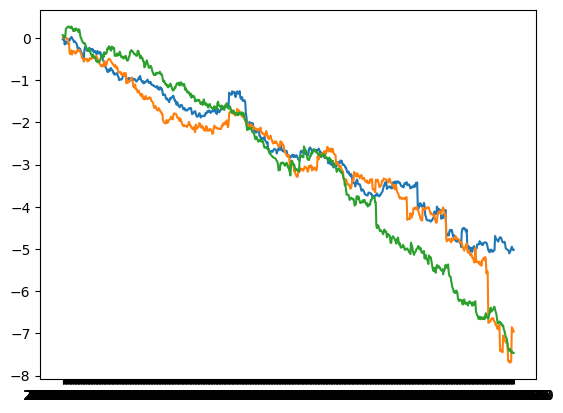

In [214]:
plt.plot(df.iloc[x1].mean())
plt.plot(df.iloc[x2].mean())
plt.plot(df.iloc[x3].mean())
plt.show()

Теперь проведем А/А-тест. Для этого воспользуемся [t-тестом с неизвестной дисперсией](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html) для проверки матожидания. Считаем, что $p < \alpha \Rightarrow$ $H_0$ отвергаем.

In [215]:
p = scipy.stats.ttest_ind(df.iloc[x1].mean(), df.iloc[x2].mean(), equal_var=False)
print(p)
print(p[1] < 0.05)

Ttest_indResult(statistic=3.2898421273933787, pvalue=0.0010268378611209233)
True


In [216]:
p = scipy.stats.ttest_ind(df.iloc[x3].mean(), df.iloc[x2].mean(), equal_var=False)
print(p)
print(p[1] < 0.05)

Ttest_indResult(statistic=-1.2131000875526723, pvalue=0.2252993391476849)
False


In [217]:
p = scipy.stats.ttest_ind(df.iloc[x1].mean(), df.iloc[x3].mean(), equal_var=False)
print(p)
print(p[1] < 0.05)

Ttest_indResult(statistic=4.095816407390064, pvalue=4.469922900922272e-05)
True


Теперь проверим равенство дисперсий с помощью [Levene test](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.levene.html). 

In [224]:
stat, p = levene(df.iloc[x1].mean(), df.iloc[x2].mean())
print(p)
print(p < 0.05)

0.13138081825745682
False


In [225]:
stat, p = levene(df.iloc[x3].mean(), df.iloc[x2].mean())
print(p)
print(p < 0.05)

1.0656121660535063e-16
True


In [226]:
stat, p = levene(df.iloc[x1].mean(), df.iloc[x3].mean())
print(p)
print(p < 0.05)

1.315780631561175e-26
True


Сохраним группы в таблицу:

In [229]:
df['group'] = ''

In [237]:
df.loc[x1, 'group'] = '1'
df.iloc[x1]

,2019-01-01,2019-01-02,2019-01-03,2019-01-04,2019-01-05,2019-01-06,2019-01-07,2019-01-08,2019-01-09,2019-01-10,...,2020-12-22,2020-12-23,2020-12-24,2020-12-25,2020-12-26,2020-12-27,2020-12-28,2020-12-29,2020-12-30,group
23602,-1.335793,-1.876770,-1.460121,-3.601532,-3.878267,-6.478434,-16.034627,-20.269810,-21.420127,-24.064985,...,18.506616,12.455565,8.889352,8.762118,6.432501,3.588056,-1.386317,-2.671916,-4.697354,1
46823,-1.295013,0.336280,0.298045,1.690380,2.983636,3.752993,3.398567,3.671673,4.951818,5.362849,...,-12.215056,-14.358366,-13.426378,-13.353495,-12.882434,-12.612936,-11.876926,-5.329059,-2.600270,1
36329,1.820220,2.896511,2.526830,0.636122,2.416616,2.835528,4.077019,4.925690,5.199700,4.490767,...,-17.489361,-18.842859,-19.094868,-17.810720,-19.597546,-19.569001,-19.255181,-21.224778,-22.232694,1
2957,-6.821558,-3.336547,-4.407450,-3.426532,-2.080056,-2.250946,-0.337173,-6.126672,-4.403750,-6.208637,...,-163.380891,-159.660469,-159.400850,-160.335177,-159.970280,-158.371897,-168.063905,-167.204689,-167.855214,1
4591,-0.180428,-0.369920,-0.298640,-0.239435,0.020066,0.132168,-0.994487,-1.182072,-2.370054,-1.830934,...,29.130658,29.100815,33.322287,31.023575,33.268768,34.506586,35.907766,34.236605,30.183149,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27265,-0.964959,-1.608479,-2.313480,-2.889116,-3.620278,-3.683727,-3.213469,-4.096523,-3.357217,-3.464918,...,-16.741641,-17.259984,-17.408577,-16.758045,-17.164183,-16.564785,-17.492983,-17.451898,-18.162375,1
46286,-0.954647,0.500006,0.730482,0.534877,-1.673799,-0.908332,-0.437927,-1.305905,-2.245838,-2.822356,...,23.313272,23.976026,23.995159,22.181517,22.977445,22.591585,25.953878,27.852161,25.389965,1
17056,1.187857,1.752882,1.890611,2.027911,1.276879,1.172486,1.121456,1.316358,1.502136,0.663686,...,42.775928,42.935794,43.117373,43.738406,44.560017,43.913640,43.675639,44.315844,44.515728,1
47103,-3.268305,0.320671,2.863265,2.278881,1.597795,4.082006,7.730275,10.187237,11.276142,10.587487,...,-19.694233,-21.835966,-20.876202,-20.453498,-14.464355,-9.604891,-8.688607,-9.430879,-19.274437,1


In [238]:
df.loc[x2, 'group'] = 2
df.iloc[x2]

,2019-01-01,2019-01-02,2019-01-03,2019-01-04,2019-01-05,2019-01-06,2019-01-07,2019-01-08,2019-01-09,2019-01-10,...,2020-12-22,2020-12-23,2020-12-24,2020-12-25,2020-12-26,2020-12-27,2020-12-28,2020-12-29,2020-12-30,group
1782,0.146454,-0.573958,1.737469,2.802049,0.058732,-0.586884,1.692962,2.263463,-0.266947,1.073948,...,-115.693072,-118.959107,-118.155779,-117.113805,-116.722175,-115.736995,-122.283273,-123.067984,-125.665647,2
12503,1.736258,3.083925,3.101050,2.118401,2.181932,2.847259,2.852957,1.721353,0.598839,2.224674,...,30.138998,30.963506,29.813780,29.864570,28.605840,28.525120,30.370781,28.210652,24.692395,2
41942,-0.984507,-0.236804,1.686592,1.392806,1.355530,0.031279,-1.752628,-0.819580,-0.753580,-3.893243,...,-17.041512,-16.995267,-15.377236,-17.793001,-16.912282,-16.285199,-17.235693,-19.298865,-19.483540,2
8792,-1.047977,-3.030484,-2.580734,-1.644910,-0.658049,-1.720852,2.171303,2.326330,3.170611,2.001387,...,-83.775038,-84.270750,-84.616728,-80.348391,-80.146974,-80.715362,-79.843684,-79.845775,-80.132796,2
35981,-0.256729,-1.223874,-2.303851,-2.098829,-1.051984,-2.038023,-1.473398,-2.129547,-2.054513,-2.501136,...,42.768060,42.771589,43.265391,42.849563,43.805344,43.304367,44.960634,46.227938,45.499089,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44394,0.280856,0.496381,2.892586,2.692293,1.718691,1.556999,2.146587,1.098020,0.219189,0.881956,...,-22.798942,-22.524906,-22.988064,-23.718647,-27.235180,-28.595676,-27.618004,-28.017057,-27.104987,2
33315,-0.976620,-1.219412,0.780771,0.199751,0.555736,0.369192,0.364544,-0.032225,-0.790593,-1.962066,...,40.426576,40.221766,40.495211,41.011126,39.760074,38.726998,38.343751,37.961048,36.321095,2
12605,11.175009,3.352250,4.689968,1.763936,3.724129,6.940663,18.208897,20.848881,18.671409,19.806717,...,15.866281,17.690983,15.854996,19.688901,20.920223,21.801013,23.614603,12.290288,12.008112,2
20482,0.847112,0.479601,1.362556,2.288041,3.012891,2.954636,2.073411,1.116418,0.250263,0.076738,...,13.110759,13.923129,14.407624,14.613152,15.495539,16.199723,15.650890,15.498062,15.428983,2


In [239]:
df.loc[x3, 'group'] = 3
df.iloc[x3]

,2019-01-01,2019-01-02,2019-01-03,2019-01-04,2019-01-05,2019-01-06,2019-01-07,2019-01-08,2019-01-09,2019-01-10,...,2020-12-22,2020-12-23,2020-12-24,2020-12-25,2020-12-26,2020-12-27,2020-12-28,2020-12-29,2020-12-30,group
39932,1.938967,1.144541,-0.270282,-1.912130,-0.821891,-3.099543,-4.320066,-7.228314,-6.965821,-9.537171,...,-94.339853,-93.219502,-95.579226,-99.049861,-101.229360,-102.545421,-103.455085,-101.459688,-101.621840,3
29526,-0.376969,-1.769330,-2.597895,-5.227876,-7.028694,-5.397201,-5.258274,-5.877382,-5.725130,-7.031224,...,7.729851,10.736119,9.880745,11.045236,13.223295,13.786431,15.625048,16.312625,12.772024,3
22269,0.632587,1.935724,3.000577,4.231189,3.608101,-0.722228,-1.667317,1.893306,0.121497,0.612997,...,58.453380,58.987039,60.010071,59.705760,59.851874,59.795985,59.146072,60.215111,61.550354,3
10994,-1.734992,-0.313486,-2.558032,-6.165965,-6.202644,-5.683669,-1.584039,-0.866500,-0.212255,0.489833,...,-40.161532,-41.330846,-44.397967,-45.743050,-46.471438,-45.097243,-41.601738,-41.098324,-41.704245,3
8832,-0.465741,-1.549776,-2.453374,-2.116407,-1.709909,-1.462411,-1.551390,-0.534729,-1.675333,-2.983700,...,-13.193730,-11.319256,-9.356843,-9.411001,-8.379466,-6.882803,-6.696392,-5.236880,-3.413519,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28354,-0.968594,-1.210204,-1.803448,-1.682637,-1.338673,-1.039947,-0.835793,0.095642,0.441641,-0.514935,...,-0.931049,-0.408073,0.177792,-0.728567,-0.722943,-1.213685,-1.393009,-0.889434,-0.899388,3
16445,1.186815,1.721895,2.174690,1.848886,2.783568,3.462674,2.431121,2.803776,4.432175,5.155164,...,-13.576174,-14.371095,-14.551200,-11.881698,-12.153165,-12.871887,-12.637400,-13.382806,-11.309195,3
28736,-1.268360,-3.611498,-3.408849,-8.228990,-13.510395,-16.528706,-17.757715,-12.905721,-15.461466,-10.124702,...,-1.833501,-3.016135,-1.887809,-3.211414,-5.555231,-6.780683,-6.710931,-5.623602,-7.554881,3
7773,2.125253,3.433502,5.898209,8.319537,6.225305,8.969930,11.170166,8.321622,8.007557,7.884285,...,-12.669534,-14.970538,-13.361538,-16.271146,-16.546495,-17.018790,-19.487959,-18.961861,-21.174071,3


In [240]:
df.to_csv('df.csv')

Теперь запишем все это в функции.

#### Функции для генерации выборок

In [3]:
import scipy
from scipy.stats import levene

In [46]:
def generate_groups(df, group_num):
    """
    xs = []
    for i in range(group_num)
        xs.append([])
    Теперь мы можем вместо x1, x2, x3 использовать xs[0], xs[1], xs[2]
    """
    x1 = []
    x2 = []
    x3 = []

    while len(x1) < 5000:
        """
        Аналогично:
        is = []
        for i in range(group_num)
            is.append([])
        Теперь мы можем вместо i1, i2, i3 использовать is[0], is[1], is[2] и т. д.
        """
        i1 = np.random.randint(df.shape[0])
        i2 = np.random.randint(df.shape[0])
        i3 = np.random.randint(df.shape[0])

        # для этой функции попробуем использовать 0.95 вместо 0.35
        if abs(df.iloc[i1].mean().mean() - df.iloc[i2].mean().mean()) < abs(df.mean().mean()) * 0.95 and \
        abs(df.iloc[i1].mean().var() - df.iloc[i2].mean().var()) < abs(df.mean().var()) * 0.95 and \
        abs(df.iloc[i1].mean().mean() - df.iloc[i3].mean().mean()) < abs(df.mean().mean()) * 0.95 and \
        abs(df.iloc[i1].mean().var() - df.iloc[i3].mean().var()) < abs(df.mean().var()) * 0.95 and \
        abs(df.iloc[i3].mean().mean() - df.iloc[i2].mean().mean()) < abs(df.mean().mean()) * 0.95 and \
        abs(df.iloc[i3].mean().var() - df.iloc[i2].mean().var()) < abs(df.mean().var()) * 0.95 and \
        i1 not in x1 and i2 not in x2 and i3 not in x3:
            x1 += [i1]
            x2 += [i2]
            x3 += [i3]
            if len(x1) % 50 == 0:
                print(len(x1), len(x2))
    return [df.iloc[x1], df.iloc[x2], df.iloc[x3]]

def conduct_tests_on_pair(df_1, df_2):
    p = scipy.stats.ttest_ind(df_1.mean(), df_2.mean(), equal_var=False)
    print(p)
    mean_val = p[1] < 0.05

    stat, p = levene(df_1.mean(), df_2.mean())
    print(p)
    var_val = p < 0.05
    
    return mean_val, var_val
    
def conduct_tests(dfs, group_num):
    b = 0
    for df1 in dfs:
        for df2 in dfs:
            if 1==1:
                b += int(conduct_tests_on_pair(df1, df2)[0] + conduct_tests_on_pair(df1, df2)[1])
    return b > 0
    # bool: прошли ли датафреймы наши тесты? (b <=> был ли хоть один True <=> 
    # <=> H_0 отвергаем хотя бы на одной группе хотя бы каким-то одним тестом?)

def find_groups(df, group_num):
    for i in range(100000):
        dfs = generate_groups(df, group_num)
        result = conduct_tests(dfs, 3)
        print(result)
        
        if result is not True:
            return result

In [5]:
df = pd.read_csv('train_data.csv')

In [6]:
groups = find_groups(df, 3)

50 50
100 100
150 150
200 200
250 250
300 300
350 350
400 400
450 450
500 500
550 550
600 600
650 650
700 700
750 750
800 800
850 850
900 900
950 950
1000 1000
1050 1050
1100 1100
1150 1150
1200 1200
1250 1250
1300 1300
1350 1350
1400 1400
1450 1450
1500 1500
1550 1550
1600 1600
1650 1650
1700 1700
1750 1750
1800 1800
1850 1850
1900 1900
1950 1950
2000 2000


KeyboardInterrupt: 

### Визуализация групп

Тут секция, где вам нужно визуализировать распределения выбранных вами метрик для найденных групп и сравнить с аналогичными разультатами для случайных групп.

Наши группы:

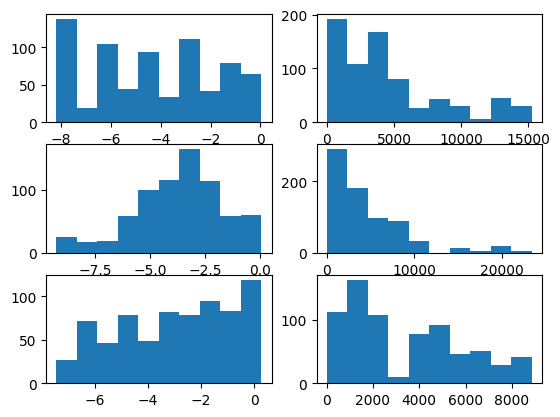

In [72]:
fig = plt.figure()
ax1 = fig.add_subplot(3,2,1)
ax1 = plt.hist(df.iloc[x1].mean())
ax2 = fig.add_subplot(3,2,2)
ax2 = plt.hist(df.iloc[x1].var())
ax3 = fig.add_subplot(3,2,3)
ax3 = plt.hist(df.iloc[x2].mean())
ax4 = fig.add_subplot(3,2,4)
ax4 = plt.hist(df.iloc[x2].var())
ax5 = fig.add_subplot(3,2,5)
ax5 = plt.hist(df.iloc[x3].mean())
ax6 = fig.add_subplot(3,2,6)
ax6 = plt.hist(df.iloc[x3].var())
plt.show()

Случайные группы:

In [73]:
y1 = df.sample(5000)
y2 = df.drop(x1).sample(5000)
y3 = df.drop(x1).drop(x2).sample(5000)

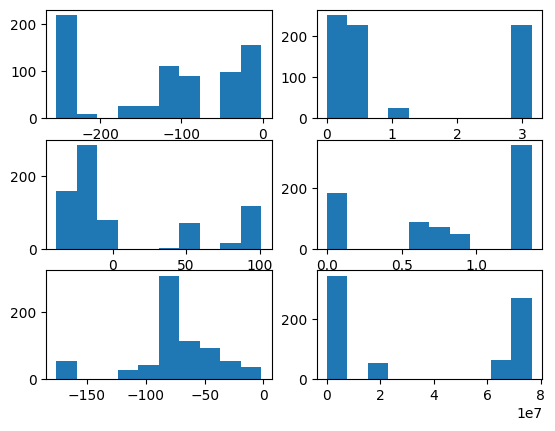

In [74]:
fig = plt.figure()
ax1 = fig.add_subplot(3,2,1)
ax1 = plt.hist(y1.mean())
ax2 = fig.add_subplot(3,2,2)
ax2 = plt.hist(y1.var())
ax3 = fig.add_subplot(3,2,3)
ax3 = plt.hist(y2.mean())
ax4 = fig.add_subplot(3,2,4)
ax4 = plt.hist(y2.var())
ax5 = fig.add_subplot(3,2,5)
ax5 = plt.hist(y3.mean())
ax6 = fig.add_subplot(3,2,6)
ax6 = plt.hist(y3.var())
plt.show()

Мы видим, что первые графики гораздо сильнее друг на друга похожи, чем графики на второй сетке (сравниваем попарно графики из разных строчек сетки графиков).

#### Приложение

Сохраняю индексы. 

In [120]:
ins = [df.iloc[x1].index, df.iloc[x2].index, 
       df.iloc[x3].index]
indexes = pd.DataFrame(columns=['group0', 'group1', 'group2'])

In [121]:
ins[0] = list(ins[0]) + (5000 - len(ins[0])) * [0]

In [122]:
ins[1] = list(ins[1]) + (5000 - len(ins[1])) * [0]

In [123]:
indexes['group0'] = ins[0]
indexes['group1'] = ins[1]
indexes['group2'] = ins[2]
indexes.to_csv('vladislav_kopchev_hw2.csv', index=False)